## Part 1 - Getting Started

In this project, we are going to design a mathematical model that predicts the critical temperature of a superconductor, as described in the paper below:

*Hamidieh, Kam, A data-driven statistical model for predicting the critical temperature of a superconductor, Computational Materials Science, Volume 154, November 2018, Pages 346-354*

The following dataset contains 21263 instances, where each instance is a set of 81 features describing the superconductor's status. Our goal is to use these features to predict the `critical_temp` column, which is a setting that the design should take into account. We will make our predictions by implementing linear regression.

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/APS1070-W23/datasets/main/superconduct.csv" , skipinitialspace=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows:
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=1`.
*   Standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'.
*   Insert a first column of all $1$s in both the training and validation data sets.


In [ ]:
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [ ]:
target = df['critical_temp'].values
print(target)

[29.   26.   19.   ...  1.98  1.84 12.8 ]


In [ ]:
df.drop(['critical_temp'], inplace=True, axis=1)

In [ ]:
### YOUR CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:].values, target, test_size=0.2, random_state=1)

In [ ]:
X_train.shape

(17010, 81)

In [ ]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
another_trans_data = X_train - mean
another_trans_data = another_trans_data / std
print(another_trans_data[:, 45].mean())
print(another_trans_data[:, 45].var())
print(another_trans_data.shape)

-3.771369525381115e-14
1.000000000000015
(17010, 81)


In [ ]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_trainStd = X_train - mean
X_trainStd = X_trainStd / std

print(X_trainStd[:, 15].mean())
print(X_trainStd[:, 15].var())

-6.251898861434857e-14
0.9999999999999996


In [ ]:
print(X_trainStd[:, 45].mean())
print(X_trainStd[:, 45].var())

-3.771369525381115e-14
1.000000000000015


In [ ]:
print(X_trainStd.shape)

(17010, 81)


In [ ]:
mean1 = np.mean(X_test, axis=0)
std1 = np.std(X_test, axis=0)
X_testStd = X_test - mean1
X_testStd = X_testStd / std1

print(X_testStd[:, 15].mean())
print(X_testStd[:, 15].var())

1.4815643030144766e-14
0.9999999999999974


In [ ]:
X_trainStd.shape[0]

17010

In [ ]:
X_testStd.shape[0]

4253

In [ ]:
X_trainStd = np.hstack((np.ones((17010,1)), X_trainStd))

In [ ]:
print(X_trainStd)

[[ 1.         -0.76951558 -1.25516534 ...  2.19994925 -0.04651646
  -0.31690616]
 [ 1.          0.61634572 -0.51899723 ... -0.40590505 -0.08049078
  -0.43365582]
 [ 1.          0.61634572 -0.77307175 ... -0.28153887  1.00413228
   1.05559993]
 ...
 [ 1.         -0.07658493  0.1941464  ... -0.62959396 -0.83629245
  -0.92966436]
 [ 1.         -1.46244623  0.30947946 ... -0.9019109  -1.72807188
  -1.47641434]
 [ 1.          0.61634572  0.15462141 ... -0.93108772 -0.90428133
  -0.70941746]]


In [ ]:
X_testStd = np.hstack((np.ones((4253,1)), X_testStd))

In [ ]:
print(X_testStd)

[[ 1.         -0.09415293 -0.36124924 ... -0.40722231 -0.84680064
  -0.52666864]
 [ 1.         -1.49917889  3.52170512 ...  1.1889625  -1.74691238
  -1.49166039]
 [ 1.          1.31087303  1.16592727 ... -0.11869625  0.65338558
   1.50415831]
 ...
 [ 1.          1.31087303 -1.01129474 ... -0.33350146  1.29320184
   1.01761159]
 [ 1.          0.60836005 -0.90389598 ... -0.26674924  1.01082002
   1.00923766]
 [ 1.         -1.49917889 -1.07713678 ... -0.83756625  2.41052564
   2.67163718]]


## Part 2 - Linear Regression Using Direct Solution

Implement the direct solution of the linear regression problem on the training set.


In [ ]:
import scipy
from sklearn.metrics import mean_squared_error
import math

In [ ]:
### YOUR CODE HERE ###
W = np.dot(scipy.linalg.inv(np.dot(X_trainStd.T, X_trainStd)), np.dot(X_trainStd.T, y_train))

yTrainPred = np.dot(X_trainStd, W)
rmseTrain = math.sqrt(mean_squared_error(yTrainPred,y_train))

yTestPred = np.dot(X_testStd, W)
rmseTest = math.sqrt(mean_squared_error(yTestPred,y_test))
print(rmseTrain)
print(rmseTest)

17.495025140326373
17.848906385124344


## Part 3 - Full Batch Gradient Descent [3 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data.

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges.

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part.

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

In [ ]:
w3 = (np.random.random(X_trainStd.shape[1])) * 0.001
print(w3)

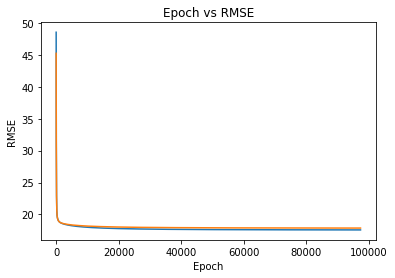

--- Total Training Time: 147.12985944747925 (s) ---


In [ ]:
import time
start_time = time.time() ## Records current time
lr = 0.01
## GD Script -- Sample code in tutorial! ##
rmseTrainList = []
rmseTestList = []

stop = 0
while stop == 0:
  yTrian3 = np.dot(X_trainStd,w3.T)
  ctrRMSE = math.sqrt(mean_squared_error(yTrian3,y_train))
  rmseTrainList.append(ctrRMSE)

  gradient = (1/len(yTrian3) * np.dot(X_trainStd.T, yTrian3-y_train))
  w3 = w3 - lr * gradient

  yTest3 = np.dot(X_testStd,w3.T)
  cteRMSE = math.sqrt(mean_squared_error(yTest3,y_test))
  rmseTestList.append(cteRMSE)

  if cteRMSE <= 1.001*rmseTest:
    stop = 1

plt.figure(figsize=(15,15))
plt.plot(rmseTrainList, label = 'Training Set')
plt.plot(rmseTestList, label = 'Validation Set')
plt.title('Epoch vs RMSE')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.show()
print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

## Part 4 - Mini-batch and Stochastic Gradient Descent

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached.

The inputs of that function are:
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays:
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes:
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged.
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`.

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).

In [ ]:
import time

In [ ]:
def batchG (XTrain,YTrain,XTest,YTest,size,lr,ct):
  w4 = (np.random.random(X_trainStd.shape[1])) * 0.001
  start_time = time.time()

  rmseTrainList4 = []
  rmseTestList4 = []
  elapsedTimeList = []
  epoch = 0
  stop = 0
  while stop == 0:
    for i in range(0,XTrain.shape[0],size):
      XTrainBatch = XTrain[i:i+size]
      YTrainBatch = YTrain[i:i+size]
      YTrainPre = np.dot(XTrainBatch, w4.T)
      gradient4 = (1/len(YTrainPre) * np.dot(XTrainBatch.T, YTrainPre-YTrainBatch))
      w4 = w4 - lr * gradient4

    yTrian4 = np.dot(XTrain,w4.T)
    ctrRMSE4 = math.sqrt(mean_squared_error(yTrian4,YTrain))
    rmseTrainList4.append(ctrRMSE4)

    yTest4 = np.dot(XTest,w4.T)
    cteRMSE4 = math.sqrt(mean_squared_error(yTest4,YTest))
    rmseTestList4.append(cteRMSE4)

    elapsedTime = time.time() - start_time
    elapsedTimeList.append(elapsedTime)

    permutation = list(np.random.permutation(XTrain.shape[0]))
    XTrain = XTrain[permutation]
    YTrain = YTrain[permutation]

    epoch = epoch + 1

    if epoch > 10:
      if cteRMSE4 <= ct:
        stop = 1
      elif cteRMSE4 > np.mean(rmseTestList4):
        stop = 1

  finalTime = elapsedTimeList[-1]

  return w4,rmseTrainList4,rmseTestList4,elapsedTimeList,finalTime

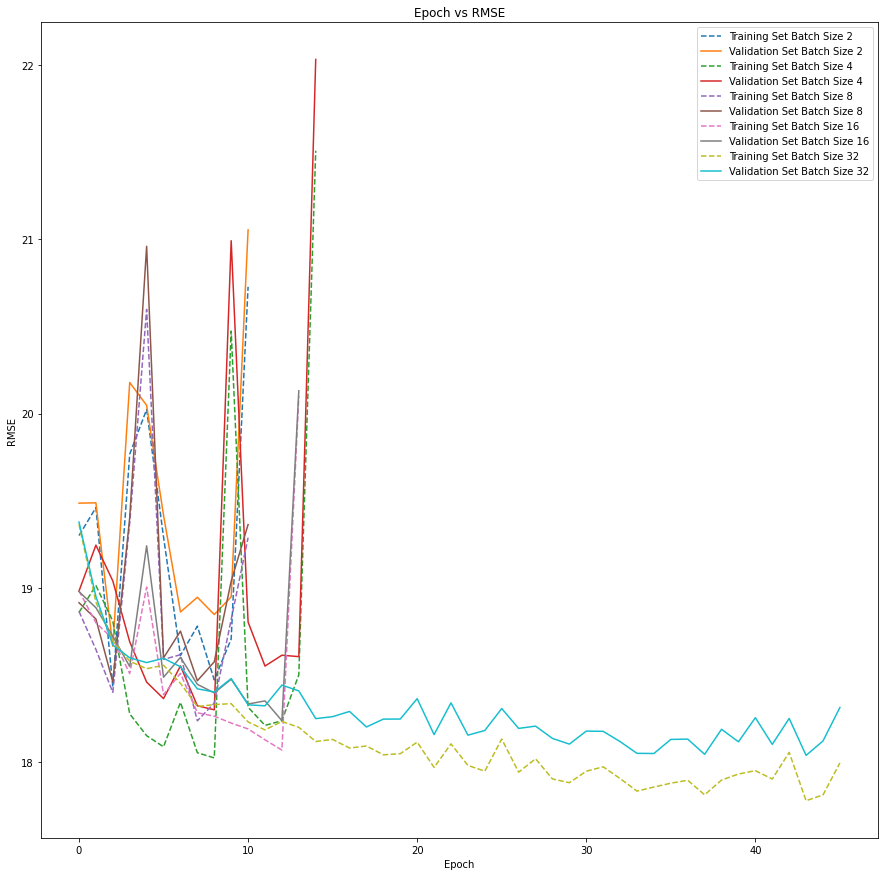

In [ ]:
#Resulting diverge batch sizes
threshold = 1.001*rmseTest
batchSizeList = [2, 4, 8, 16, 32]
plt.figure(figsize=(15,15))
for batch in batchSizeList:
  weight, rmsetr,rmsete,timeList,totalTime = batchG(X_trainStd,y_train,X_testStd,y_test,batch,0.01,threshold)
  plt.title('Epoch vs RMSE')
  plt.plot(rmsetr, label = 'Training Set Batch Size {}'.format(batch), linestyle = 'dashed')
  plt.plot(rmsete, label = 'Validation Set Batch Size {}'.format(batch))
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.legend()

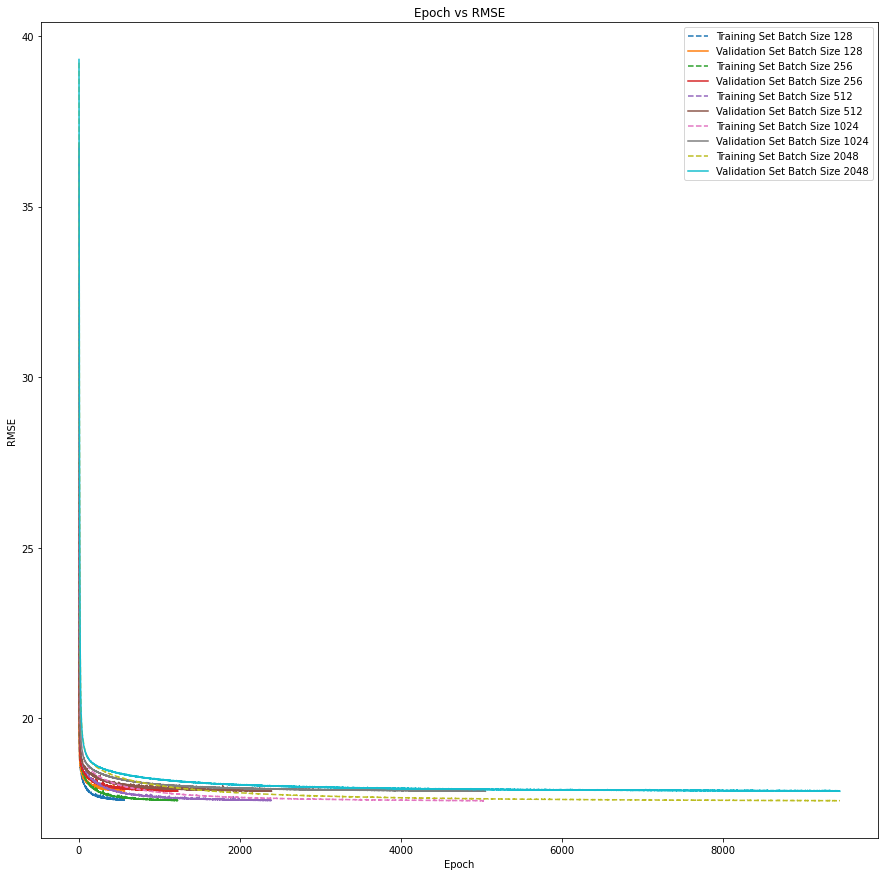

In [ ]:
threshold = 1.001*rmseTest
batchSizeList = [128, 256, 512, 1024, 2048]
plt.figure(figsize=(15,15))
for batch in batchSizeList:
  weight, rmsetr,rmsete,timeList,totalTime = batchG(X_trainStd,y_train,X_testStd,y_test,batch,0.01,threshold)
  plt.title('Epoch vs RMSE')
  plt.plot(rmsetr, label = 'Training Set Batch Size {}'.format(batch), linestyle = 'dashed')
  plt.plot(rmsete, label = 'Validation Set Batch Size {}'.format(batch))
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.legend()

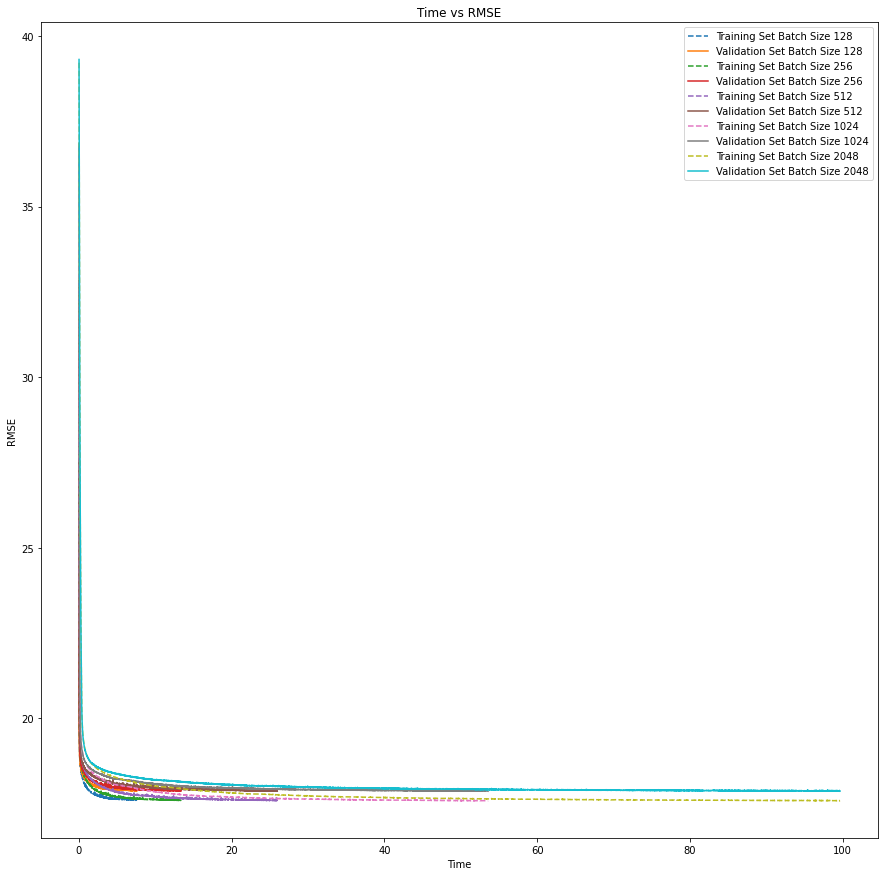

In [ ]:
threshold = 1.001*rmseTest
batchSizeList = [128, 256, 512, 1024, 2048]
plt.figure(figsize=(15,15))
for batch in batchSizeList:
  weight, rmsetr,rmsete,timeList,totalTime = batchG(X_trainStd,y_train,X_testStd,y_test,batch,0.01,threshold)
  plt.title('Time vs RMSE')
  plt.plot(timeList,rmsetr, label = 'Training Set Batch Size {}'.format(batch), linestyle = 'dashed')
  plt.plot(timeList,rmsete, label = 'Validation Set Batch Size {}'.format(batch))
  plt.xlabel('Time')
  plt.ylabel('RMSE')
  plt.legend()

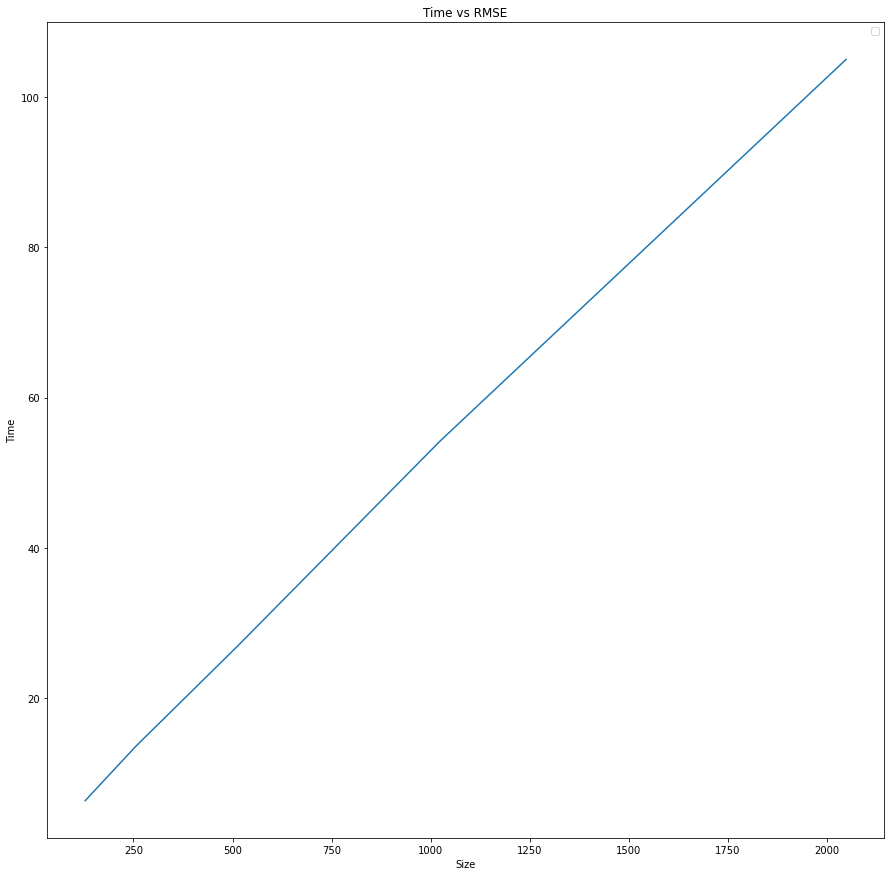

In [ ]:
threshold = 1.001*rmseTest
batchSizeList = [128, 256, 512, 1024, 2048]
plt.figure(figsize=(15,15))
totalTimeList = []
epochList = []
for batch in batchSizeList:
  weight, rmsetr,rmsete,timeList,totalTime = batchG(X_trainStd,y_train,X_testStd,y_test,batch,0.01,threshold)
  totalTimeList.append(totalTime)

plt.title('Time vs RMSE')
plt.plot(batchSizeList,totalTimeList)
plt.xlabel('Size')
plt.ylabel('Time')
plt.legend()

## Part 5 - Gradient Descent Learning Rate
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

In [ ]:
### YOUR CODE HERE ###
batchList5 = [4,8,16]
threshold = 1.00*rmseTest
plt.figure(figsize=(15,15))
reportList = []
for batch in batchList5:
  for i in range(1,11):
    lr5 = i * 0.0001
    print(i)
    weight, rmsetr,rmsete,timeList,totalTime = batchG(X_trainStd,y_train,X_testStd,y_test,batch,lr5,threshold)

    finalRMSE = rmsete[-1]
    if finalRMSE < threshold:
      reportList.append([batch,lr5,rmsetr[-1],finalRMSE])
      print(reportList)
      break


1
[[4, 0.0001, 17.570922141964974, 17.848880911832396]]
1
[[4, 0.0001, 17.570922141964974, 17.848880911832396], [8, 0.0001, 17.562869715541297, 17.84842647786827]]
1
[[4, 0.0001, 17.570922141964974, 17.848880911832396], [8, 0.0001, 17.562869715541297, 17.84842647786827], [16, 0.0001, 17.56070630561384, 17.84875639123148]]


<Figure size 1080x1080 with 0 Axes>

In [ ]:
columns = ['batch', 'learning_rate', 'rmse_training', 'rmse_validation']
df5 = pd.DataFrame(reportList, columns=columns)

In [ ]:
df5

,batch,learning_rate,rmse_training,rmse_validation
0,4,0.0001,17.570922,17.848881
1,8,0.0001,17.562870,17.848426
2,16,0.0001,17.560706,17.848756


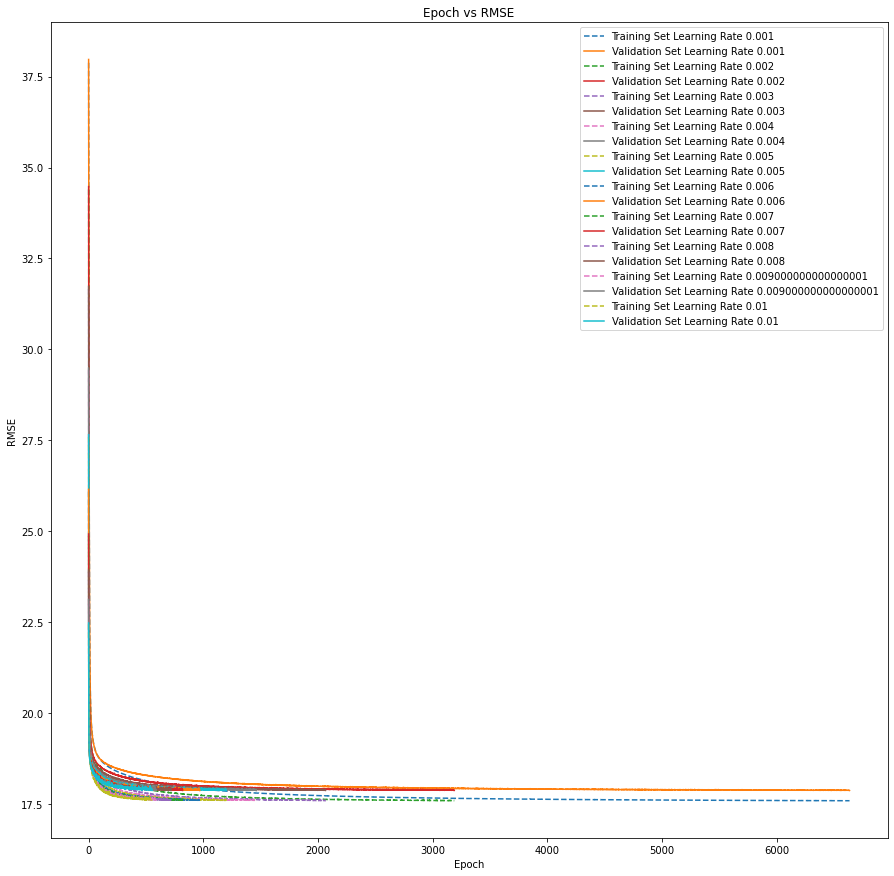

In [ ]:
threshold = 1.001*rmseTest
plt.figure(figsize=(15,15))
for i in range(1,11):
  lr55 = i * 0.001
  weight, rmsetr,rmsete,timeList,totalTime = batchG(X_trainStd,y_train,X_testStd,y_test,128,lr55,threshold)
  plt.title('Epoch vs RMSE')
  plt.plot(rmsetr, label = 'Training Set Learning Rate {}'.format(lr55), linestyle = 'dashed')
  plt.plot(rmsete, label = 'Validation Set Learning Rate {}'.format(lr55))
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.legend()

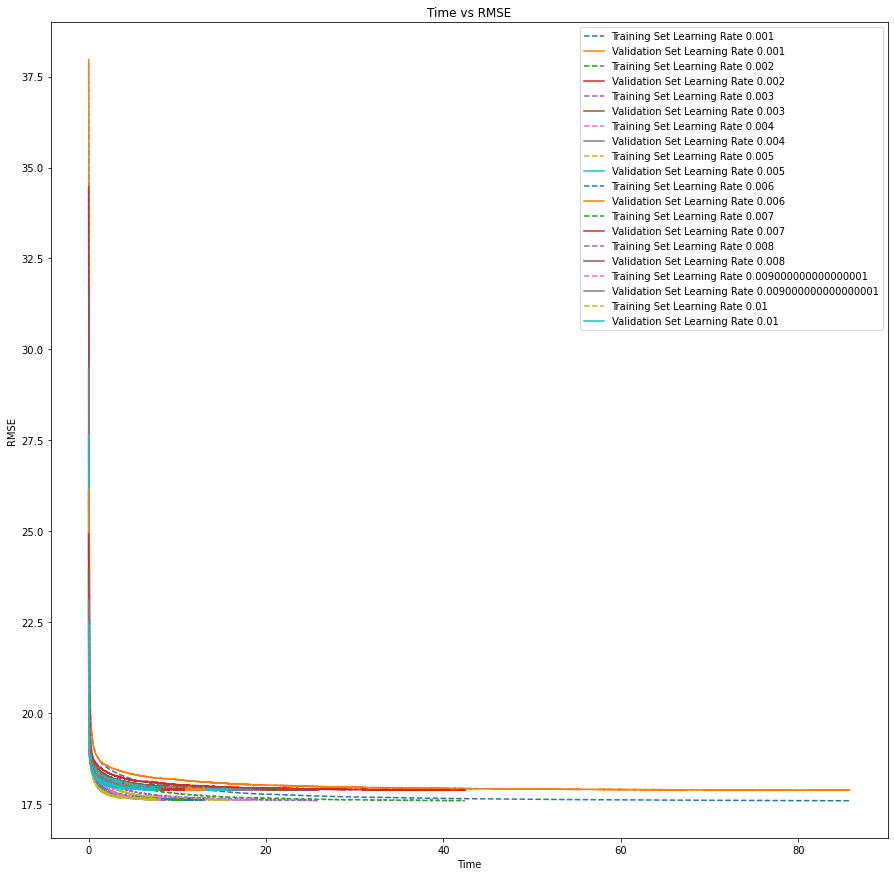

In [ ]:
threshold = 1.001*rmseTest
plt.figure(figsize=(15,15))
for i in range(1,11):
  lr55 = i * 0.001
  weight, rmsetr,rmsete,timeList,totalTime = batchG(X_trainStd,y_train,X_testStd,y_test,128,lr55,threshold)
  plt.title('Time vs RMSE')
  plt.plot(timeList,rmsetr, label = 'Training Set Learning Rate {}'.format(lr55), linestyle = 'dashed')
  plt.plot(timeList,rmsete, label = 'Validation Set Learning Rate {}'.format(lr55))
  plt.xlabel('Time')
  plt.ylabel('RMSE')
  plt.legend()